In [192]:
from pygooglenews import GoogleNews
import pandas as pd
import newspaper
import wordcloud
import matplotlib.pyplot as plt

In [193]:
gn = GoogleNews(lang='en', country='US')

In [194]:
res = gn.search('Russia', when='1m')

In [195]:
a = 0
df = pd.DataFrame()

In [196]:
def paper(url, df):
    article = newspaper.Article(url)
    article.download()
    article.parse()
    article.nlp()
    for keyword in article.keywords:
        df = df.append({'list': keyword}, ignore_index=True)
    return df

In [197]:
for link in range(0, 101):
    try:
        df = paper(res['entries'][a]['link'], df)
        a += 1
    except:
        a += 1
        
    

In [199]:
stopwords = set(wordcloud.STOPWORDS)
stopwords.update(['1m', 'read', 'russia', 'week', 'year', 'day', 'month'])

In [200]:
ml = pd.DataFrame(df['list'].value_counts()).reset_index()

In [201]:
wordcloud = wordcloud.WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords,
            max_words=50,
            min_font_size = 10).generate(' '.join(ml['index']))

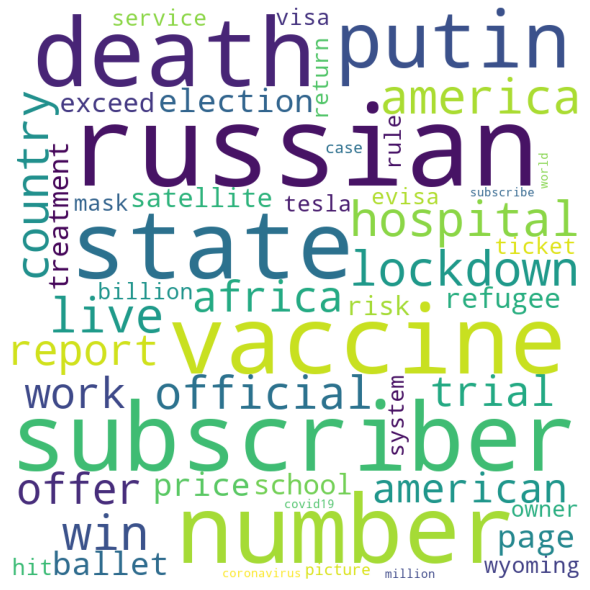

In [202]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 